# Kaggle competition: Prediction of survivors on Titanic

This is the most popurlar machine learning competitive project on Kaggle.com for beginners of data mining. Competitors try to build a prediction model to predict survival of passengers on Titanic based on analysing their information,such as age, sex, cabin class,etc.

Last modified: 2018.2.19

Author：Huiting Huang

# 1.Data loading

In [40]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [27]:
#import training examples
data_train = pd.read_csv("/Users/emma/Desktop/2018/data/project/Titanic/train.csv")
data_test = pd.read_csv("/Users/emma/Desktop/2018/data/project/Titanic/test.csv")

#sns.set_style('whitegrid')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
data_train.info()
print("-"*40)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [29]:
# Check duplicates
print "training data:",len(data_train['PassengerId'].unique())
print "testing data:",len(data_test['PassengerId'].unique())

training data: 891
testing data: 418


In [30]:
#Descriptive statistics of training data
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


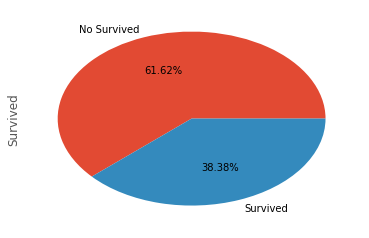

In [31]:
#Plot a pie chart of survived passengers and not survived passengers
data_train['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'],autopct = '%1.2f%%')

# 2. Preliminary analysis

# 2.1 Relation between survival and cabin class

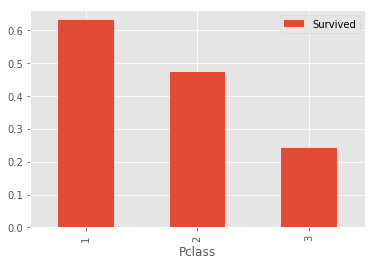

In [32]:
data_train[['Pclass','Survived']].groupby('Pclass').mean().plot(kind = 'bar')

This figure shows the proportion of passengers survived at each cabin class. There is more than 60% passengers from the first class survived, much more than the passengers from the 2nd and 3rd class, which implies that cabin class should be considered as a feature deciding passengers'survival.

# 2.2 Relation between survival and sex

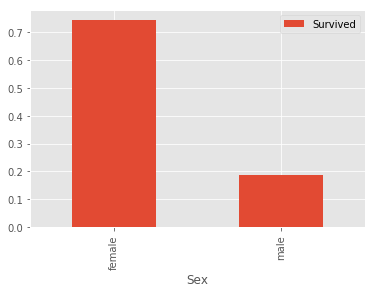

In [33]:
data_train[['Sex','Survived']].groupby('Sex').mean().plot.bar()

The figure presents the survival proportion for female and male. According to the figure above, "Lady First" leads to the result that the survival proportion of female is much larger than the proportion of male. So sex has to be selected as a feature when training the prediction model.

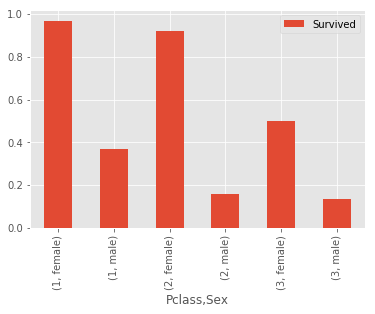

In [34]:
#Present female survival proportion and male survival proportion at each cabin class respectively.
data_train[['Pclass','Sex','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

Consistent with the result of analysis above, the survival proportion of female is much higher than male in each cabin class. But female survival proportion at the 1st and 2nd class is close to 100% which is almost twice than the fraction at the 3rn class.

# 2.3 Relation between survival and age

In [35]:
len(data_train['Age'].dropna())

714

Text(0.5,0,u'Age')

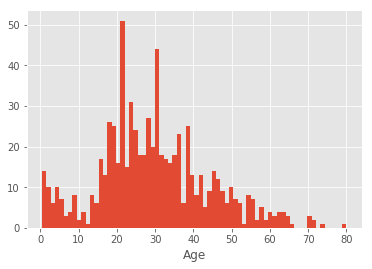

In [36]:
#Distribution of age of passengers
ax = data_train['Age'].hist(bins = 70)
ax.set_xlabel('Age')

(0, 80.0)

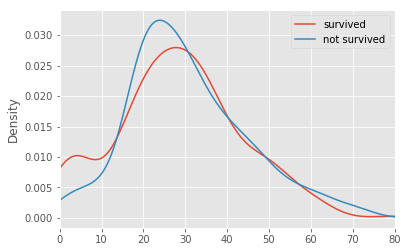

In [37]:
# Probability density distribution of the survived and not survived
plt.figure()
data_train.Age[data_train.Survived == 1].plot(kind = 'kde')
data_train.Age[data_train.Survived == 0].plot(kind = 'kde')

plt.legend(['survived','not survived'])
plt.xlim(0,data_train.Age.max())

As can be seen in the probability density distribution, both survivors and victims are 20 to 30 year-old and the most part of the area under two curves are overlap, which does not show many differences between two groups. Moreover, there are many missing data in age field in the training dataset. So further analysis of passengers'age is required. 


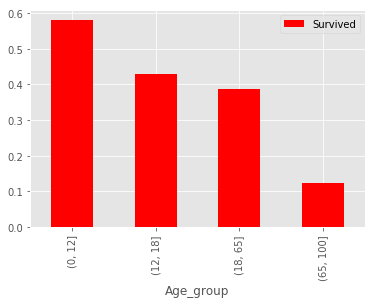

In [39]:
# Proportion of the survived in different age groups
bins = [0,12,18,65,100]
data_train['Age_group'] = pd.cut(data_train['Age'],bins)
ax = data_train.groupby('Age_group').Survived.mean().plot(kind = 'bar',color = 'r')
ax.legend(loc = 'best')

Passengers' age is divide into four groups: Children(0-12),Youth(12-18), adults(18-65) and elderly(65-100). The figure above indicates the survival proportion of passengers in the four age groups. The survival proportion decreases with the increase of age,which means age should be regarded as an important feature when training the model. However, missing values should be filled before training. Random Forest algorithm is selected to predicts the missing values of age.

# 2.4 Relation between survival and name

In [42]:
# define a function to extract the title of every passenger
def name_cut(name):
    name = name.replace(" ","")
    pre_position = name.find(",")
    fol_position = name.find(".")
    title = name[pre_position+1:fol_position]
    return title

In [43]:
data_train['Title']=data_train['Name'].apply(name_cut)

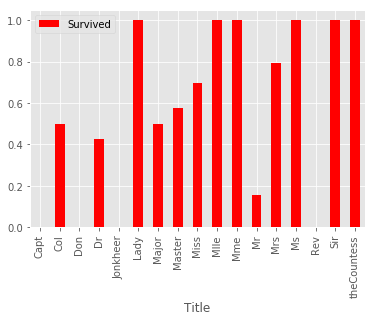

In [44]:
#Plot the number of passengers with different titles
ax = data_train.groupby('Title').Survived.mean().plot(kind='bar',color = 'r')
ax.legend(loc = 'upper left')

This figure presents the survival proportion of passengers with various titles. The percentage of survived passengers with different titles varies, but the number is higher for the titles related to female. There is a concern that the model might be overfit if 'Title' is selected as a feature as well as 'Sex' due to the correlation between these two factors. So 'Title' is reserved for the feature selection temporarily.

# 2.5 Relation between survival and the number of siblings/spouses (SibSp)

In [45]:
# Divide passengers into two groups: with/without siblings
SibSp_df = data_train.Survived[data_train['SibSp']!=0]
no_SibSp_df = data_train.Survived[data_train['SibSp']==0]

Text(0.5,1,u'no_sibsp')

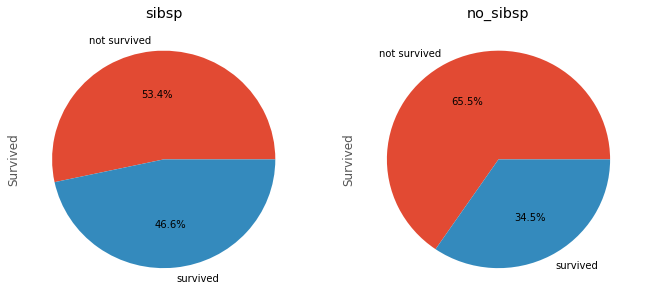

In [46]:
# Plot pie charts of survival porportion in two groups 
fig = plt.figure(figsize = (11,5))
ax1 = fig.add_subplot(121)
SibSp_df.value_counts().plot.pie(labels = ['not survived','survived'],autopct = '%1.1f%%')
ax1.set_title('sibsp')

ax2 = fig.add_subplot(122)
no_SibSp_df.value_counts().plot.pie(labels = ['not survived','survived'],autopct = '%1.1f%%')
ax2.set_title('no_sibsp')

# 2.6 Relation between survival and number of parents/children (Parch)

In [47]:
# Divide passengers into two groups: with/without parents
parch_df = data_train.Survived[data_train['Parch']!=0]
no_parch_df = data_train.Survived[data_train['Parch']==0]

Text(0.5,1,u'no_parch')

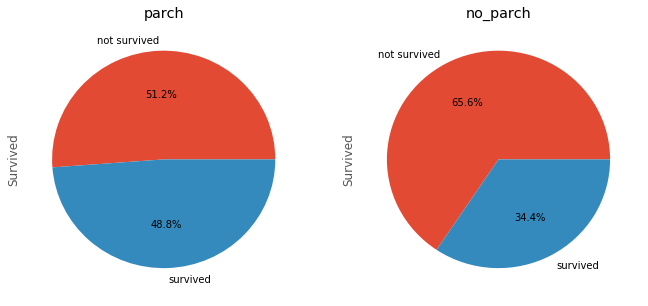

In [48]:
# Plot pie charts of survival porportion in two groups 
fig = plt.figure(figsize = (11,5))
ax1 = fig.add_subplot(121)
parch_df.value_counts().plot.pie(labels = ['not survived','survived'],autopct = '%1.1f%%')
ax1.set_title('parch')

ax2 = fig.add_subplot(122)
no_parch_df.value_counts().plot.pie(labels = ['not survived','survived'],autopct = '%1.1f%%')
ax2.set_title('no_parch')

From the figures in 2.5 and 2.6 analysis, the survival percentage of passengers with parents and siblings is higher than the percentage of those without families or relatives. Two factors, number of parents and siblings can be combined as a new feature, family size. Next step is the analysis of relation between survival and family size.

Text(0,0.5,u'Survived')

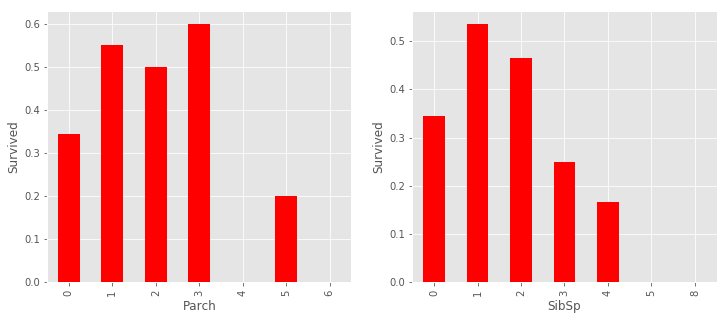

In [49]:
#Plot the survival percentage of passengers with different number of Parch/SibSp
fig,ax = plt.subplots(1,2,figsize=(12,5))
data_train.groupby('Parch').Survived.mean().plot(kind = "bar",ax = ax[0],color = 'r')
ax[0].set_ylabel('Survived')

data_train.groupby('SibSp').Survived.mean().plot(kind = 'bar',ax = ax[1],color = 'r')
ax[1].set_ylabel('Survived')

The two figures above show the survival proportion of passengers with different number of Parch and Sibsp.

Text(0,0.5,u'Survived')

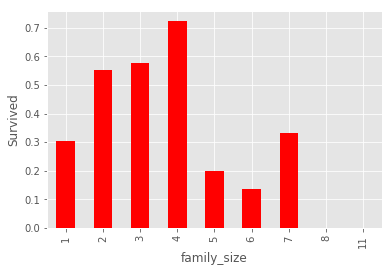

In [51]:
# Add the number of Parch and Sibsp together to get fimaly size
data_train['family_size']=data_train['Parch']+data_train['SibSp']+1
# plot the proportion of survived passengers of different fimily size
ax = data_train.groupby('family_size').Survived.mean().plot.bar(color = 'r')
ax.set_ylabel('Survived')

According to the figure indicating the survival percentage of passengers with different fimaily size, the percentage of passenger with middle size of family is higher than the passengers with no family or family size more than 4.


# 2.7 Relation between survival and ticket

Ticket number for every passenger should be unique so that there could not be strong correlation between survival and ticket number. So 'Ticket' is reserved for the feature selection temporarily.

# 2.8 Relation between survival and fare

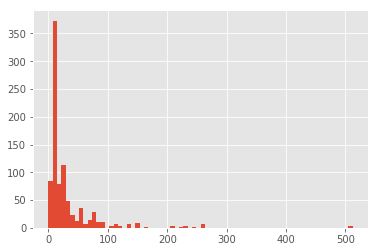

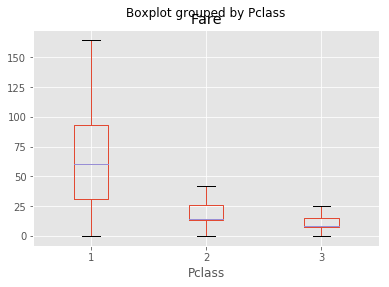

In [52]:
# Distribution of fare

data_train['Fare'].hist(bins=70)

data_train.boxplot(column = 'Fare',by='Pclass',showfliers=False)

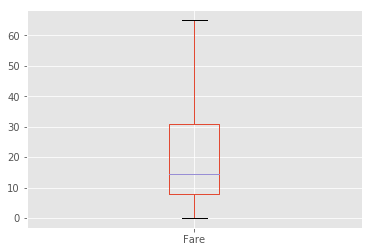

In [53]:
#Descriptive statistics of Fare
data_train.Fare.describe()
data_train.boxplot(column = 'Fare',showfliers=False)

[Text(0,0,u'not survived'), Text(0,0,u'survived')]

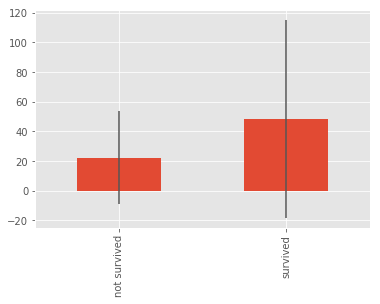

In [54]:
#plot average value and standard deviation of fare for two groups:not survived and survived,respectively.

fare_not_survived = data_train['Fare'][data_train['Survived'] == 0]
fare_survived = data_train['Fare'][data_train['Survived'] == 1]

average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])

ax = average_fare.plot(kind = 'bar',yerr = std_fare,legend = False)
ax.set_xticklabels(['not survived','survived'])

This figure shows the mean fare and the fare range between +1/-1 standard deviation of not survived passengers and survived passengers. The mean fare of the survived is higher than not survived. And the one standard deviation range is wider than that of not survived. This means fare may bring effects on survival. But there is high correlation between cabin class and the model might be overfit if both fare and cabin class are chosen as training features. 

# 2.9 Relation between survival and cabin number

In [55]:
# check missing values

len(data_train.Cabin.dropna())

204

In [56]:
# Distribution of cabin
data_train.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

There are many missing values in 'Cabin' field so that it is hard to figure out the relationship between cabin number and survival. However, the relation can be analyzed in a different way. Passengers can be divided into two groups, with cabin number and without cabin numeber, and the proportion of these two groups is calculated below.

In [57]:
# plot proportion of the survived in two groups:with or without cabin number

#fill missing values with 'u0'

data_train['Cabin']=data_train.Cabin.fillna('U0')

In [58]:
#data_train['Cabin']

[Text(0,0,u'no cabin'), Text(0,0,u'have cabin')]

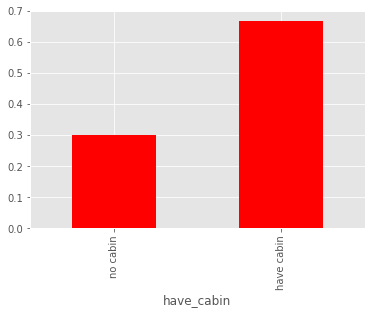

In [64]:
#Plot the survival proportion of two groups:with/without cabin number
data_train['have_cabin'] = data_train['Cabin'].apply(lambda x:0 if x=='U0' else 1)                                              
ax = data_train.groupby('have_cabin').Survived.mean().plot.bar(color = 'r')
ax.set_xticklabels(['no cabin','have cabin'])

The figure above indicates the proportion of the survived in two groups: 'no cabin' and 'have cabin'. The survival proportion of passengers with cabin number is more than twice than passengers without cabin number, which implies passengers with cabin number are easier to get rescued. 

# 2.10 是否获救与港口（Embarked）的关系

Text(0,0.5,u'Survived')

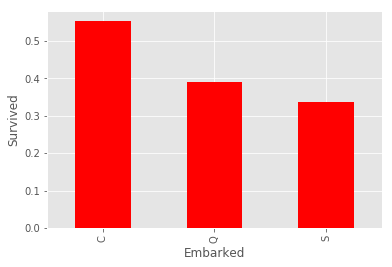

In [63]:
# plot proportion of the survived from different ports embarked

ax = data_train.groupby('Embarked').Survived.mean().plot(kind = 'bar',color='r')
ax.set_ylabel('Survived')

The figure above shows the survival proportion of passengers embarking from different ports. The highest number is found in Port C and Port Q has the second highest ratio, while the lowest number appears in Port S. 

# 2.11 Summaries

根据以上分析，可以得出一下结论：

1. 船舱等级（Pclass），性别（sex），年龄（Age），称号（Title），有无父母兄弟姐妹（SibSp and Parch），票价（Fare），有无船舱（have_cabin）,登船港口（Embarked）与是否获救都有一定影响。

2. 根据当时“老人孩子和女士优先“的情况，可以确定性别和年龄是非常重要的特征，但年龄的缺失值过多，需要用模型预测来填补缺失值。

3. Cabin的缺失值也非常多，而且对乘客是否获救并没有直接影响，可以考虑直接舍弃。但通过将Cabin分为有和无两类，分析有无船舱对获救与否的关系，发现有无船舱对结果还是有一定影响，故决定保留。

4. Ticket这个特征对于每个乘客应该是unique的，并不能找到和获救的直接联系，而且类目繁杂，故决定舍弃。

5. 称号（Title）这个特征和性别（Sex）有很强的相关性，如果两者同时入选，也许会带来过拟合的问题，故在初步建模中，先决定舍弃。

6. 同理，票价（Fare）和船舱等级（Pclass）也有一定的相关性，但仍然考虑保留，因为也许乘客等级可以根据票价来细分从而优化模型。

入选特征为：船舱等级（Pclass），性别（sex），年龄（Age），有无父母兄弟姐妹（family_size），票价（Fare），有无船舱（have_cabin）,登船港口（Embarked）

The analysis in section 2.1-2.11 can be summarized as below:
1. These factors, Cabin class(Pclass), sex(sex), age(age), title(title), family size(family_size), Fare(Fare), cabin number(have_cabin) and embarked ports(Embarked),have influences on survival.
2. Age and sex should be important training features due to the rescuing principle,'lady,child and elder first'. However, there are many missing values in 'Age' field in training dataset. The missing data should be filled by a machine learning model.
3. There is also missing data in 'Cabin'. To facilitate the analysis, missing values are filled as "no cabin" and passengers are divived into two groups: with cabin number and without cabin number. The survival proportion of passengers with cabin number is more than twice than passengers without cabin number.
4. There is no direct relationship between ticket number and survival, so this factor is not selected as a training feature temporarily.
5. 'Title' is strongly related to sex, so overfitting problem may be introduced if both 'title' and 'sex' are selected as training features. 'Title' will not be selected currently since 'sex' is selected.

Current selected features: cabin class(Pclass),sex(sex),age(age),family size(family_size),fare(fare),cabin number(have_cabin),embarked ports(Embarked)

# 3. Data preprocessing


There are missing data in these selected features: age and embarked ports.

1.Embarked ports: there are only two missing values. The missing values are filled by the mode. 

In [65]:
#fill null values in Embarked column
data_train.Embarked[data_train.Embarked.isnull()]=data_train.Embarked.dropna().mode().values

/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
len(data_train.Embarked.dropna())

891


2.Age:according to summaries of section 2, age is an important training feature and there are many missing values. So the missing data should be filled by a prediction model. Here random forest model is applied to the data filling.

In [67]:
from sklearn.ensemble import RandomForestRegressor
# choose training data to predict age
age_df = data_train[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[age_df['Age'].notnull()].as_matrix()
age_df_null = age_df.loc[age_df['Age'].isnull()].as_matrix()

X = age_df_notnull[:,1:]
Y = age_df_notnull[:,0]

# use RandomForest classifier to train data
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_null[:,1:])
data_train['Age_filled'] = data_train['Age']
data_train.Age_filled[data_train['Age_filled'].isnull()] = predictAges

/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [68]:
len(data_train['Age_filled'].dropna())

891

Text(0.5,0,u'Age')

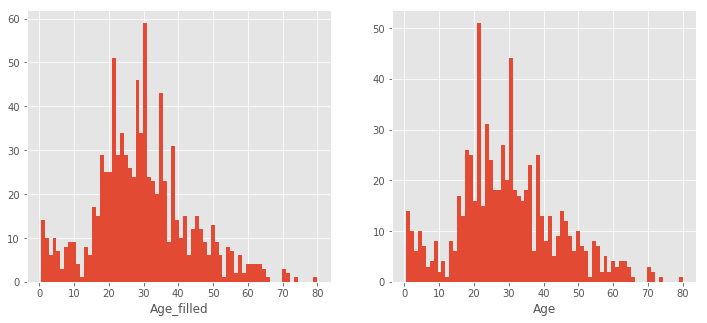

In [69]:
# distribution of filled age and age with missing values
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(121)
data_train.Age_filled.hist(bins = 70)
ax1.set_xlabel('Age_filled')

ax2 = fig.add_subplot(122)
data_train.Age.hist(bins = 70)
ax2.set_xlabel('Age')

The figures above shows the distribution of filled age data and the age data with missing values. The left figure indicates the random forest model predicts the missing values to be centralized between 20 and 40.

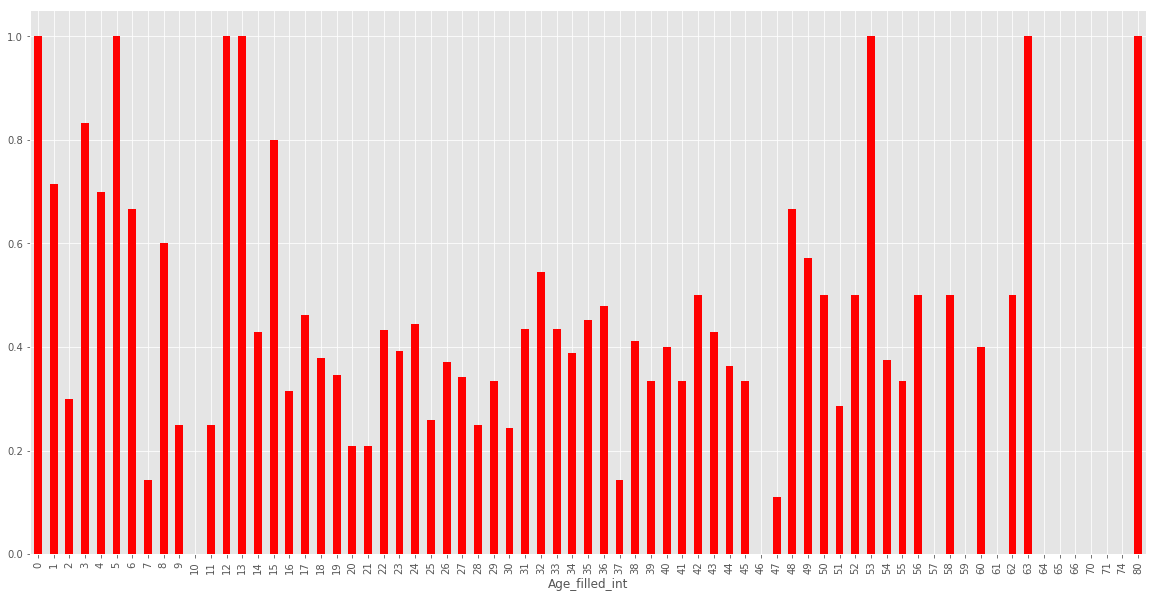

In [73]:
# Plot the survival porportion at different ages
data_train['Age_filled_int'] = data_train['Age_filled'].astype(np.int32)
plt.figure(figsize=(20,10))
data_train.groupby('Age_filled_int').Survived.mean().plot(kind = 'bar',color='r')


The figure above shows the proportion of survived passengers at different ages. Generally, the survival proportion of children and elder is higher than people from other age groups.

# 4. Feature engineering

# 4.1 Feature abstraction

In [74]:
# Feature abstraction for categorical data: convert categorical variable into dummy/indicator variables

dummies_Embarked = pd.get_dummies(data_train['Embarked'],prefix = 'Embarked')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

dummies_Sex = pd.get_dummies(data_train['Sex'],prefix = 'Sex')

df_feature = pd.concat([data_train, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_feature.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked','Age','Age_group','Title','Parch','SibSp'],axis = 1,inplace = True)

df_feature.head()

,PassengerId,Survived,Fare,family_size,have_cabin,Age_filled,Age_filled_int,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,7.2500,2,0,22.0,22,0,0,1,0,1,0,0,1
1,2,1,71.2833,2,1,38.0,38,1,0,0,1,0,1,0,0
2,3,1,7.9250,1,0,26.0,26,0,0,1,1,0,0,0,1
3,4,1,53.1000,2,1,35.0,35,0,0,1,1,0,1,0,0
4,5,0,8.0500,1,0,35.0,35,0,0,1,0,1,0,0,1


# 4.2 Feature scaling

In [76]:
# feature scaling: The scale of feature 'Fare' and 'Age' is much larger than other features.
# Scale down data of 'Fare' and 'Age' by standardization 
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
df_feature['Age_scaled'] = scaler.fit_transform(df_feature['Age_filled'].values.reshape(-1,1))

df_feature['Fare_scaled'] = scaler.fit_transform(df_feature['Fare'].values.reshape(-1,1))

df_feature.head()


,PassengerId,Survived,Fare,family_size,have_cabin,Age_filled,Age_filled_int,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,7.2500,2,0,22.0,22,0,0,1,0,1,0,0,1,-0.561868,-0.502445
1,2,1,71.2833,2,1,38.0,38,1,0,0,1,0,1,0,0,0.612870,0.786845
2,3,1,7.9250,1,0,26.0,26,0,0,1,1,0,0,0,1,-0.268183,-0.488854
3,4,1,53.1000,2,1,35.0,35,0,0,1,1,0,1,0,0,0.392607,0.420730
4,5,0,8.0500,1,0,35.0,35,0,0,1,0,1,0,0,1,0.392607,-0.486337


# 4.3 Preprocess test data in the same way

In [77]:
# preprocess test dataset in the same way as how the training data is preprocessed

#feature:family_size
data_test['family_size'] = data_test['SibSp']+data_test['Parch']

#feature:have_cabin
data_test['Cabin'] = data_test['Cabin'].fillna('U0')
data_test['have_cabin']=data_test.Cabin.apply(lambda x: 0 if x == 'U0' else 1)

#feature:embarked,Pclass and Sex

dummies_Embarked_test = pd.get_dummies(data_test['Embarked'],prefix = 'Embarked')

dummies_Pclass_test = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')

dummies_Sex_test = pd.get_dummies(data_test['Sex'],prefix = 'Sex')

df_test = pd.concat([data_test, dummies_Embarked_test, dummies_Sex_test, dummies_Pclass_test], axis=1)

#feature:age
df_test_age = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
df_test_isnull = df_test_age.loc[df_test_age['Age'].isnull()].as_matrix()

predictAges_test = RFR.predict(df_test_isnull[:,1:])
data_test['Age_filled'] = data_test['Age']
data_test.Age_filled[data_test['Age_filled'].isnull()] = predictAges_test

print len(data_test.Age_filled.dropna())

df_test['Age_scaled'] = scaler.fit_transform(data_test['Age_filled'].values.reshape(-1,1))

#feature:fare
data_test.Fare[data_test.Fare.isnull()]=data_test.Fare.dropna().mode().values

df_test['Fare_scaled'] = scaler.fit_transform(data_test['Fare'].values.reshape(-1,1))

df_test.head()

/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U0,...,0,1,0,0,1,0,0,1,0.307028,-0.497063
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U0,...,0,0,1,1,0,0,0,1,1.255945,-0.511926
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U0,...,0,1,0,0,1,0,1,0,2.394647,-0.463754
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U0,...,0,0,1,0,1,0,0,1,-0.262323,-0.482127
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U0,...,0,0,1,1,0,0,0,1,-0.641890,-0.417151


# 5. Train a logistic regression classifier

In [41]:
from sklearn import linear_model

# extract all the features we need to create training dataset
df_train = df_feature.filter(regex='Survived|Age_scaled|family_size|Fare_scaled|have_cabin|Embarked_.*|Sex_.*|Pclass_.*')
#print df_train.head()

Y = df_train.values[:,0]
X = df_train.values[:,1:]

# Build a logistic regression model 
clf = linear_model.LogisticRegression()
clf.fit(X,Y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# 6. Predict survivals of test data using the classifier

In [118]:
x_test = df_test.filter(regex='Age_scaled|family_size|Fare_scaled|have_cabin|Embarked_.*|Sex_.*|Pclass_.*')

#print x_test.head()

test_age_predictions = clf.predict(x_test.values)
result = pd.DataFrame({'PassengerId':df_test.PassengerId.values,'Survived':test_age_predictions.astype(np.int32)})
#print result
result.to_csv("/Users/emma/Desktop/2018/data/project/Titanic/logistic_regression_predictions.csv", index=False)


# Score of my first submission in Kaggle:0.75598


# 7.Model(classifier) optimization

# 7.1 Model evaluation

The score of my first submission in Kaggle shows predictions of the model does not fit the survivals in test data quite well. The model can be evaluated as followed:


# 7.1.1 Coefficient of each feature 

In [43]:
# Retrieve coefficients of features in the classifying model

pd.DataFrame({"columns":list(df_train.columns)[1:], "coef":list(clf.coef_.T)})

,coef,columns
0,[-0.246162147648],family_size
1,[0.919800175044],have_cabin
2,[0.235782400637],Embarked_C
3,[0.19308593692],Embarked_Q
4,[-0.213484519638],Embarked_S
5,[1.43187604328],Sex_female
6,[-1.21649222537],Sex_male
7,[0.676265802319],Pclass_1
8,[0.365367105088],Pclass_2
9,[-0.826249089488],Pclass_3


From the table showing coefficients of features in the model, the following features contribute relatively important influence to the desicition of survival:
1. With/without cabin num:     
 The final result is high-positively correlated to the feature, with/without cabin number,which means people with cabin number are likely be considered as surviviors in model's judgement. But there are still some victims with cabin number according to the analysis in section 2.9. It is probably too rough to classify passengers into two groups: with or without cabin number and the roughness affects the model's desicion. This feature could be subdivived to improve the model's simulation. 
2. Sex:    
 As expected, the feature, sex, has significent impact on the survival. 
3. Cabin class:       
 The final result is positively correlated to the first and second cabin class, while it is negatively correlated to the third cabin class. 
4. Age:    
 There is negative correlation between survival and age, which is not consistent with the rescuing principle,'lady,child and elder first'. 
5. Fare:    
 The final result is not highly correlated to the feature,fare. The value of coefficient is lower than expectation, because fare has correlation with cabin class and cabin class has large impact on the final result. There is reasonable doubt that it is not the best way to train the classifier to input fare as a continuous variable. 


# 7.1.2 Cross validation

Calculte scores of cross validation by dividing the training data into 5 folds to evaluate the model's simualtions.

In [44]:
from sklearn import cross_validation

# Test the score of cross validation of all training data
X = df_train.as_matrix()[:,1:]
y = df_train.as_matrix()[:,0]
clf_cv = linear_model.LogisticRegression()
print cross_validation.cross_val_score(clf_cv,X,Y,cv = 5)

[ 0.81564246  0.80446927  0.79213483  0.79775281  0.81355932]


From the score of cross validation, the precision of model simulations is around 80%. The next step is to retrieve bad cases by spliting training data into two sets, training set and cross valiadation set, by 7:3.

In [45]:
#split training data into two sets by 7:3,one for training and another one for cross validation
split_train_ori, split_cv_ori = cross_validation.train_test_split(df_feature, test_size=0.3, random_state=0)
split_train = split_train_ori.filter(regex='Survived|Age_scaled|family_size|Fare_scaled|have_cabin|Embarked_.*|Sex_.*|Pclass_.*')
split_cv = split_cv_ori.filter(regex='Survived|Age_scaled|family_size|Fare_scaled|have_cabin|Embarked_.*|Sex_.*|Pclass_.*')

#train the classifier
clf.fit(split_train.as_matrix()[:,1:], split_train.as_matrix()[:,0])

#predict survivals of cross validation dataset
cv_predictions = clf.predict(split_cv.as_matrix()[:,1:])
cv_pred_result = pd.DataFrame({'PassengerId':split_cv_ori.PassengerId.values,'Survived':cv_predictions.astype(np.int32)})

origin_data_train = pd.read_csv("/Users/emma/Desktop/2018/data/project/Titanic/train.csv")

#Retrieve bad cases about predictions in cross validation set
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(cv_pred_result.PassengerId[cv_pred_result['Survived']!=split_cv['Survived']].values)]
bad_cases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.00,1,0,345763,18.0000,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.00,1,0,4136,9.8250,NaN,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C



Besides studying bad cases, another important evaluation method is learning curve. Learning curve can be used to evaluate overfitting or underfitting problem of model. 

# 7.1.3 Learning curve

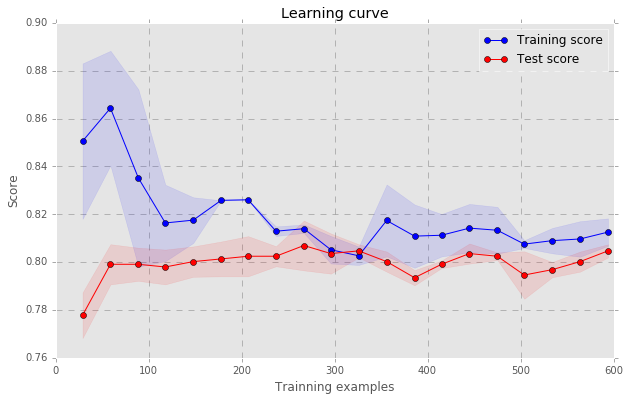

In [46]:
# Plotting learning curves
import numpy as np
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    train_sizes,train_scores,test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Trainning examples")
    plt.ylabel("Score")
    plt.grid(color='grey', linestyle='--', linewidth=0.5)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                     alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                     alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Test score")

    plt.legend(loc="best")
    
    #plt.draw()
    #plt.show()
    #plt.gca().invert_yaxis()

plot_learning_curve(clf, "Learning curve", X, y)

According to learning curve, the estimator is underfit and there is still space to increase its simulation. The model can be improved by selecting more training features optimizing selected features,i.e. categorizing continuous variable or subdividing categorical variable with rough classification.

# 7.2 Model optimization


According to the analysis above, the estimator can be optimized in the following ways:

1.Optimize 'Title' feature by categotizing titles of passengers into five catefories:Officer,Royalty,Mrs,Miss,Mr and Master 

In [184]:
# Categorize passengers by their titles

#print data_train.Title.unique()

title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Don', 'Sir', 'theCountess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))

df_feature['Title'] = data_train['Title'].map(title_Dict)
#df_feature.Title.unique()

data_test['Title']=data_test['Name'].apply(name_cut)
df_test['Title'] = data_test['Title'].map(title_Dict)

Title_train_test = df_feature['Title'].append(df_test['Title'])
Title_id = pd.factorize(Title_train_test)[0]

df_feature['Title'] = Title_id[:891]
df_test['Title'] = Title_id[891:]


2.Transfer the continuous variable,'age',to discrete variable by categorizing age into four groups

In [125]:
# Categorize passengers into different age groups
bins = [0,12,18,65,100]
data_train['Age_group'] = pd.cut(data_train['Age_filled'],bins)
data_train['Age_group'].astype(str)
Age_group_dict = {'(0, 12]':0,'(12, 18]':1,'(18, 65]':2,'(65, 100]':3}

data_train['Age_group'] = data_train['Age_group'].map(Age_group_dict)
df_feature['Age_group'] = data_train['Age_group']

data_test['Age_group'] = pd.cut(data_test['Age_filled'],bins)
df_test['Age_group'] = data_test['Age_group'].map(Age_group_dict)

3.Transfer the continuous variable,'Fare',to discrete variable by dividing all fares into quartiles

In [177]:
# Divide all fares into quartiles
Fare_train_test = data_train['Fare'].append(data_test['Fare'])

data_Fare_bin = pd.qcut(Fare_train_test, 5)
data_Fare_bin_id = pd.factorize(data_Fare_bin)[0]

df_feature['Fare_bin_id'] = data_Fare_bin_id[:891]
df_test['Fare_bin_id'] = data_Fare_bin_id[891:]

4.Subdivivde cabin number by the letters in the front

In [178]:
# create feature for the alphabetical part of the cabin number
import re

data_train['CabinLetter'] = data_train['Cabin'].apply( lambda x : re.compile("([a-zA-Z]+)").match(x).group())
#data_train['CabinLetter'].unique()
data_test['CabinLetter'] = data_test['Cabin'].apply( lambda x : re.compile("([a-zA-Z]+)").match(x).group())

# convert the distinct cabin letters with incremental integer values
data_train['Cabin_num'] = pd.factorize(data_train['CabinLetter'])[0]
df_feature['Cabin_num'] = data_train['Cabin_num']

data_test['Cabin_num'] = pd.factorize(data_test['CabinLetter'])[0]
df_test['Cabin_num'] = data_test['Cabin_num']

5.Remodel

In [203]:
# Create logistic regression classifier and predict passengers to be survived or not in test dataset
df_train_opt = df_feature.filter(regex='Survived|family_size|Embarked_.*|Sex_.*|Pclass_.*|Title|Age_group|Cabin_num|Fare_bin_id')

Y_opt = df_train_opt.values[:,0]
X_opt = df_train_opt.values[:,1:]

# Build an optimized logistic regression model 
clf_opt = linear_model.LogisticRegression()
clf_opt.fit(X_opt,Y_opt)

x_test_opt = df_test.filter(regex='Survived|family_size|Embarked_.*|Sex_.*|Pclass_.*|Title|Age_group|Cabin_num|Fare_bin_id')

test_age_predictions_opt = clf_opt.predict(x_test_opt.values)
result_opt = pd.DataFrame({'PassengerId':df_test.PassengerId.values,'Survived':test_age_predictions_opt.astype(np.int32)})
#print result
result_opt.to_csv("E:/data/project/Titanic/logistic_regression_predictions_opt.csv", index=False)


# Score of my optimized submission in Kaggle:0.76076

# 7.3. Model ensemble

Here model ensemble is done by bagging method.

In [205]:
# Perform model ensembleing by using Bagging package in sklearn
from sklearn.ensemble import BaggingRegressor

clf = linear_model.LogisticRegression()
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X_opt, Y_opt)

predictions_ME = bagging_clf.predict(x_test_opt)
result_ME = pd.DataFrame({'PassengerId':df_test.PassengerId.values, 'Survived':predictions_ME.astype(np.int32)})
result_ME.to_csv("E:/data/project/Titanic/logistic_regression_bagging_predictions.csv", index=False)

# Score of my optimized submission by model ensembling in Kaggle:0.77511

# 8. Summaries



In this project, a classfier to predict survivors on Titanic is trained by analyzing the information of passengers, including age,sex,cabin class,family size,etc. The accuracy of this estimator is around 77.5%. To improve the model's simulation, further work is required:
1. Feature selection is based on the real life experience and analysis of relation between each feature and survival in this model. It is not efficient when optimizing the estimator due to a lot effort on feature engineering. A more efficient way is to use GridSearchCV method to ask various models for help to select training features.   

2. Simulations of missing values of age should be improved by model ensemble. Age,as an important training feature is not selected to train the estimator of age because the survival data in test dataset is absent. Competitors are not allowed to know the correct answers in a Kaggle competition.    

3. In this project, only one machine learning algorithm is applied to train the classifier. More machine learning models can be involved in model ensemble to improve the accurancy of the survival estimator.